## Import Libraries and Load Data

In [6]:
#general packages for data manipulation
import pandas as pd
#visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#consistent sized plot 
from pylab import rcParams
rcParams['figure.figsize']=12,5
rcParams['axes.labelsize']=12
rcParams['xtick.labelsize']=12
rcParams['ytick.labelsize']=12
#handle the warnings in the code
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)
#text preprocessing libraries
from nltk.corpus import stopwords
from nltk.tokenize import WordPunctTokenizer
#import texthero
#import texthero as hero
#regular expressions
import re
#display pandas dataframe columns 
pd.options.display.max_columns = None

load csv file as pandas dataframe

In [7]:
data = pd.read_csv(r'C:\VSCode\NLP4B_Football\Own_model\model creation\complete_dataset.csv')

#drop the first column because it is not necessary
print(data.head())
print(data.shape)

#copy to a new dataframe
df = data.copy()

# convert comment column to string
df['comment'] = df['comment'].astype(str)

                                             comment  source  label
0  As a woman you shouldn't complain about cleani...  kaggle      0
1  boy dats cold...tyga dwn bad for cuffin dat ho...  kaggle      1
2  Dawg!!!! You ever fuck a bitch and she start t...  kaggle      1
3  The shit you hear about me might be true or it...  kaggle      1
4  The shit just blows me..claim you so faithful ...  kaggle      1
(3862, 3)


# Text Cleaning

Convert emojis to text

In [8]:
import emoji

def convert_emojis_to_word(comment):
    '''Function to convert emojis to words'''
    # Convert emojis to text
    comment_with_emojis = emoji.demojize(comment)
    return comment_with_emojis

# Apply the function to the comment column
df['comment'] = df['comment'].apply(convert_emojis_to_word)

# print row 663 to see the result
print(df['comment'].iloc[663])

england is t=not aawys the best but atleast they tried:smiling_face_with_tear::smiling_face_with_tear::smiling_face_with_tear::smiling_face_with_tear::loudly_crying_face::loudly_crying_face::loudly_crying_face:


Find things to remove and how often they appear

In [9]:
# Function to check for pattern
def check_for_pattern(regex, dataframe, column_name):
    '''Function to check for how often a pattern appears in a dataframe column and returns a list of all the items found'''
    pattern = re.compile(regex)
    result = []
    for i in range(len(dataframe[column_name])):
        phrase = (re.findall(pattern, str(dataframe[column_name][i])))  # Convert column values to string
        if phrase != []:
            result.append(phrase[0])
    print("Total items found:", len(result), result)
    return result

# Check for user handles
user_handles = check_for_pattern(r'@[\w]*', df, 'comment')

# Check for hashtags
hashtags = check_for_pattern(r'#[\w]*', df, 'comment')

# Check for URLs
urls = check_for_pattern(r'https?://[A-Za-z0-9./]+', df, 'comment')

# Check for punctuations
punctuations = check_for_pattern(r'[^\w\s]', df, 'comment')

# Check for numbers 18, 88, 1312
numbers = check_for_pattern(r'18|88|1312', df, 'comment')
#print rows with numbers 18, 88, 1312, show only the comment column and show the whole comment
print(numbers)
# --> no need to worry



Total items found: 5 ['@soccerboy_04', '@bluprint_4', '@KingCuh', '@WestYourMajesty', '@']
Total items found: 54 ['#Shots', '#2MW', '#HappyHumpDay', '#Eaglesnation', '#EarlyChristmas', '#CowboysNation', '#TehGodClan', '#Yankees', '#FreeMoneyMelle', '#oomf', '#scally', '#fixed', '#KingOfTheHill', '#UCFPINKPARTY', '#bum', '#hoesaintloyal', '#real', '#Pisces', '#GerrysHalloweenParty', '#MTVHottest', '#Yankees', '#ProtectTheAnimals', '#Damn', '#', '#blondeproblems', '#scally', '#History', '#frenchscally', '#YoureNotMyType', '#shitmybosssays', '#shitallysays', '#FreshRhymes', '#128514', '#JT2020Tour', '#50centmovie', '#ThankYouPaulForConfirmingLarry', '#NottingHill', '#8230', '#233', '#8230', '#RIPTALLT', '#65292', '#Tupac', '#afterearth', '#SNL', '#hoes', '#ShitFahdSays', '#redskins', '#1', '#r', '#BAH', '#WHAT', '#5', '#Well']
Total items found: 2 ['https://x.com/dfb', 'https://youtu.be/8dIQ56YACvE']
Total items found: 2875 ["'", '.', '!', '.', '.', ':', '.', '?', '.', "'", "'", '.', '#',

Remove these patterns

In [10]:

# Remove user handles
df.replace(r'@[\w]*', '', regex=True, inplace=True)

# Remove hashtags
df.replace(r'#[\w]*', '', regex=True, inplace=True)

# Remove URLs
df.replace(r'https?://[A-Za-z0-9./]+', '', regex=True, inplace=True)

# Remove punctuations
df.replace(r'[^\w\s]', '', regex=True, inplace=True)

# Remove digits
df.replace(r'\d+', '', regex=True, inplace=True)

# Replace underscores with spaces
df.replace(r'_', ' ', regex=True, inplace=True)

# show random 5 rows
df.sample(5, random_state=1)

# print row 663 to see the result
print(df['comment'].iloc[663])

england is tnot aawys the best but atleast they triedsmiling face with tearsmiling face with tearsmiling face with tearsmiling face with tearloudly crying faceloudly crying faceloudly crying face


Decapitalize

In [11]:
df["comment"] = df["comment"].str.lower()

# print 662 row
print(df["comment"].iloc[663])

england is tnot aawys the best but atleast they triedsmiling face with tearsmiling face with tearsmiling face with tearsmiling face with tearloudly crying faceloudly crying faceloudly crying face


Tokenize

In [12]:
# Convert comment to strings
df['comment'] = df['comment'].apply(str)

# Tokenize using Tokenizer
tokenizer = WordPunctTokenizer()
df['comment'] = df['comment'].apply(tokenizer.tokenize)

# Show random 5 rows
df.sample(5, random_state=2)

,comment,source,label
2172,"[good, luck, to, both, although, im, personall...",reddit,0
3003,"[croatia, deserve, that, goal, and, more]",reddit,0
1711,"[forza, bologna]",youtube,0
2622,"[cam, on, ingerland, score, sam, gaos]",reddit,0
3082,"[own, goal]",reddit,0


Remove Stopwords

In [13]:
#remove stopwords
stopwords = stopwords.words('english')
df['comment'] = df['comment'].apply(lambda x: [item for item in x if item not in stopwords])

#show random 5 rows
df.sample(5, random_state=1)

,comment,source,label
1135,"[cant, believe, icardi, missed, penalty, score...",youtube,0
1857,"[congratulations, morocco, win, th, world, mea...",youtube,0
2481,"[another, long, past, due, debt, paid, footbal...",reddit,0
988,"[inter, arsenal, surprise, package, seasons, c...",youtube,0
102,"[little, stupid, bitch, dont, fuck, yoooooouuuu]",kaggle,1


Remove special characters

In [14]:
def rem_nonalpha(text):
    '''Function to remove the non-alphanumeric characters from the text'''
    text = [word for word in text if word.isalpha()]
    return text

# Apply the function to the 'comment' column
df['comment'] = df['comment'].apply(rem_nonalpha)

Remove digits

In [15]:
# Remove digits from each comment in the DataFrame
def remove_digits(comment):
    return [item for item in comment if not item.isdigit()]

# Apply the function to the 'comment' column
df['comment'] = df['comment'].apply(remove_digits)

Check for data balance

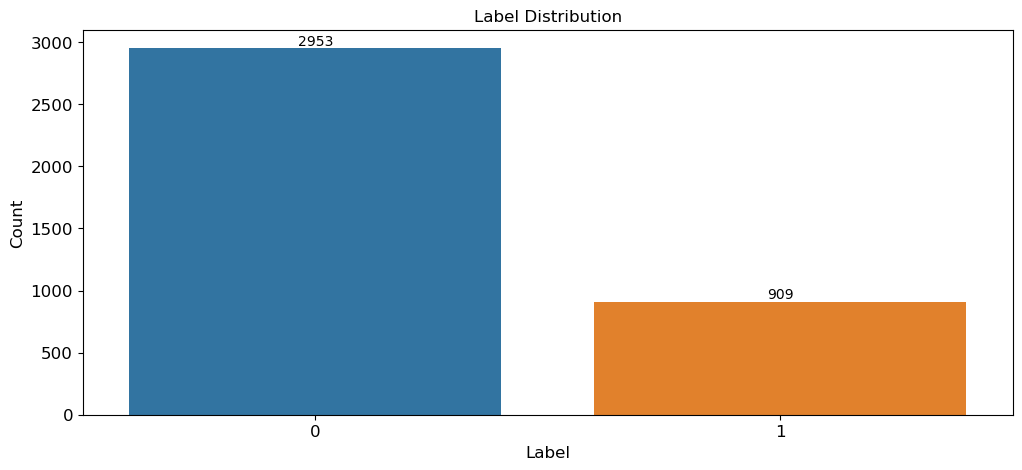

In [16]:
sns.countplot(x='label', data=df)
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
for index, value in df['label'].value_counts().items():
    plt.text(index, value, str(value), ha = 'center', va = 'bottom')
plt.show()




Explore most frequently used words

In [17]:
from collections import Counter
results = Counter()
df['comment'].apply(results.update)
#print the top 10 most common terms in the tweet 
print(results.most_common(10))

[('like', 308), ('game', 253), ('tears', 253), ('team', 235), ('face', 207), ('bitch', 188), ('england', 177), ('dont', 170), ('one', 161), ('im', 154)]


## Predictive Modelling

Data formatting and predictive modelling

In [18]:
# check for null values
print(f"Null values: {df.isnull().sum()}")

Null values: comment    0
source     0
label      0
dtype: int64


In [19]:
# join comment back together
df["comment"] = df["comment"].apply(lambda x: ' '.join(x))

# show random 5 rows
df.sample(5, random_state=1)

,comment,source,label
1135,cant believe icardi missed penalty scored norm...,youtube,0
1857,congratulations morocco win th world mean real...,youtube,0
2481,another long past due debt paid football manci...,reddit,0
988,inter arsenal surprise package seasons champio...,youtube,0
102,little stupid bitch dont fuck yoooooouuuu,kaggle,1


In [20]:
#split data into input X and output y
X = df['comment']
y = df['label']

In [21]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3089,) (773,) (3089,) (773,)


In [22]:
# use TfidfVectorizer to convert the raw documents into feature matrix
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(X_train).todense()
X_test = vectorizer.transform(X_test).todense()
print(X_train.shape, X_test.shape)

(3089, 5000) (773, 5000)


# Model building: Ordinary logistics regression

In [23]:
import numpy as np
# ordinary logistic regression
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()
logreg.fit(np.asarray(X_train), np.asarray(y_train))
train_predictions = logreg.predict(np.asarray(X_train))
test_predictions = logreg.predict(np.asarray(X_test))


Model evaluation

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

# accuracy score
print(f"Train Accuracy: {accuracy_score(y_train, train_predictions)}")
print(f"Test Accuracy: {accuracy_score(y_test, test_predictions)}")

Train Accuracy: 0.8883133700226611
Test Accuracy: 0.851228978007762


In [25]:
# classification report
print("Train Classification Report")
print(classification_report(y_train, train_predictions))
print("Test Classification Report")
print(classification_report(y_test, test_predictions))

Train Classification Report
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      2371
           1       0.98      0.53      0.69       718

    accuracy                           0.89      3089
   macro avg       0.93      0.76      0.81      3089
weighted avg       0.90      0.89      0.88      3089

Test Classification Report
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       582
           1       0.92      0.43      0.59       191

    accuracy                           0.85       773
   macro avg       0.88      0.71      0.75       773
weighted avg       0.86      0.85      0.83       773



Weighted logistic regression

In [26]:
# define the weight of the classes using inverse ratio
weights = {0: 1.0, 1:13.0}
#instantiate the logistic regression model and account for the weights to be applied for model coefficients update magnitude
logreg = LogisticRegression(class_weight=weights)

#fit the model
logreg.fit(np.asarray(X_train), np.asarray(y_train))
train_predictions = logreg.predict(np.asarray(X_train))
test_predictions = logreg.predict(np.asarray(X_test))

#classification report
print("Train Classification Report")
print(classification_report(y_train, train_predictions))
print("Test Classification Report")
print(classification_report(y_test, test_predictions))

Train Classification Report
              precision    recall  f1-score   support

           0       1.00      0.87      0.93      2371
           1       0.69      1.00      0.82       718

    accuracy                           0.90      3089
   macro avg       0.85      0.93      0.87      3089
weighted avg       0.93      0.90      0.90      3089

Test Classification Report
              precision    recall  f1-score   support

           0       0.93      0.74      0.82       582
           1       0.51      0.82      0.63       191

    accuracy                           0.76       773
   macro avg       0.72      0.78      0.73       773
weighted avg       0.82      0.76      0.78       773



Regularization and Hyperparameter Tuning

In [27]:
# regularization and hyperparameter tuning
'''from sklearn.model_selection import GridSearchCV
# define the grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
# instantiate the model
logreg = LogisticRegression(class_weight=weights)
# instantiate the grid search model
grid_search = GridSearchCV(logreg, param_grid, cv=5)
# fit the grid search to the data
grid_search.fit(np.asarray(X_train), np.asarray(y_train))
# print the best parameters
print(f"Best Parameters: {grid_search.best_params_}")'''

'# regularization and hyperparameter tuning\nfrom sklearn.model_selection import GridSearchCV\n# define the grid\nparam_grid = {\'C\': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}\n# instantiate the model\nlogreg = LogisticRegression(class_weight=weights)\n# instantiate the grid search model\ngrid_search = GridSearchCV(logreg, param_grid, cv=5)\n# fit the grid search to the data\ngrid_search.fit(np.asarray(X_train), np.asarray(y_train))\n# print the best parameters\nprint(f"Best Parameters: {grid_search.best_params_}")'

Fine tuned Model with Balanced Class Weights

In [28]:
'''# retrieve the best model
best_model = result.best_estimator_
print(best_model)

NameError: name 'result' is not defined

In [29]:
#instantiate the best model
logreg = LogisticRegression(C=10, class_weight={0: 1.0, 1: 13}, penalty='l1', solver='liblinear')

In [30]:
logreg.fit(np.asarray(X_train), np.asarray(y_train))  # Fit the logistic regression model

train_predictions = logreg.predict(np.asarray(X_train))
test_predictions = logreg.predict(np.asarray(X_test))

# Classification report
print("Train Classification Report")
print(classification_report(y_train, train_predictions))
print("Test Classification Report")
print(classification_report(y_test, test_predictions))

# Confusion matrix
print("Train Confusion Matrix")
print(confusion_matrix(y_train, np.asarray(train_predictions)))
print("Test Confusion Matrix")
print(confusion_matrix(y_test, np.asarray(test_predictions)))


Train Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2371
           1       0.99      1.00      1.00       718

    accuracy                           1.00      3089
   macro avg       1.00      1.00      1.00      3089
weighted avg       1.00      1.00      1.00      3089

Test Classification Report
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       582
           1       0.69      0.65      0.67       191

    accuracy                           0.84       773
   macro avg       0.79      0.78      0.78       773
weighted avg       0.84      0.84      0.84       773

Train Confusion Matrix
[[2365    6]
 [   1  717]]
Test Confusion Matrix
[[525  57]
 [ 66 125]]


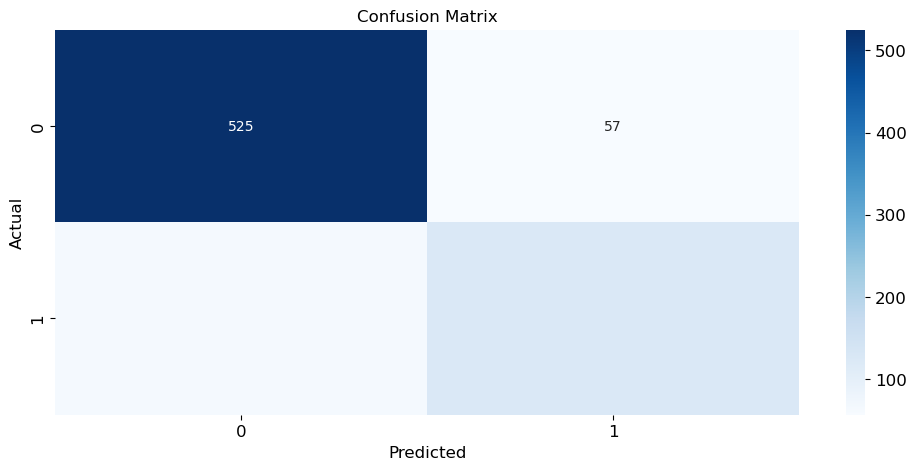

In [31]:
# confusion matrix as a heatmap
conf_matrix = confusion_matrix(y_test, test_predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Export model

In [32]:
#export model
import joblib
joblib.dump(logreg, 'logreg_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']

# make prediction with model

In [51]:
# make predictions on a new dataframes column "comment"
# make predictions on a new dataframes column "comments"
new_data = pd.read_excel(r'C:\VSCode\NLP4B_Football\Own_model\model creation\youtube_cleaned_for_label_NEW.xlsx')
new_data["comments"] = new_data["comments"].astype(str)
new_data["comments"] = new_data["comments"].apply(convert_emojis_to_word)
new_data.replace(r'@[\w]*', '', regex=True, inplace=True)
new_data.replace(r'#[\w]*', '', regex=True, inplace=True)
new_data.replace(r'https?://[A-Za-z0-9./]+', '', regex=True, inplace=True)
new_data.replace(r'[^\w\s]', '', regex=True, inplace=True)
new_data.replace(r'\d+', '', regex=True, inplace=True)
new_data.replace(r'_', ' ', regex=True, inplace=True)
new_data['comments'] = new_data['comments'].apply(tokenizer.tokenize)
new_data['comments'] = new_data['comments'].apply(lambda x: [item for item in x if item not in stopwords])
new_data['comments'] = new_data['comments'].apply(rem_nonalpha)
new_data['comments'] = new_data['comments'].apply(remove_digits)
new_data["comments"] = new_data["comments"].apply(lambda x: ' '.join(x))
new_data["comments"] = new_data["comments"].astype(str)
new_data_predictions = logreg.predict(np.asarray(vectorizer.transform(new_data["comments"]).todense()))
new_data["label"] = new_data_predictions
new_data.to_excel(r'C:\VSCode\NLP4B_Football\Own_model\model creation\pred_youtube_cleaned_for_label.xlsx', index=False)


evaluate newdata

label
0    1633
1     140
Name: count, dtype: int64
label
0    0.921038
1    0.078962
Name: proportion, dtype: float64
type
league           0.578571
international    0.421429
Name: proportion, dtype: float64
type
league           0.578571
international    0.421429
Name: proportion, dtype: float64
type
league           81
international    59
Name: count, dtype: int64


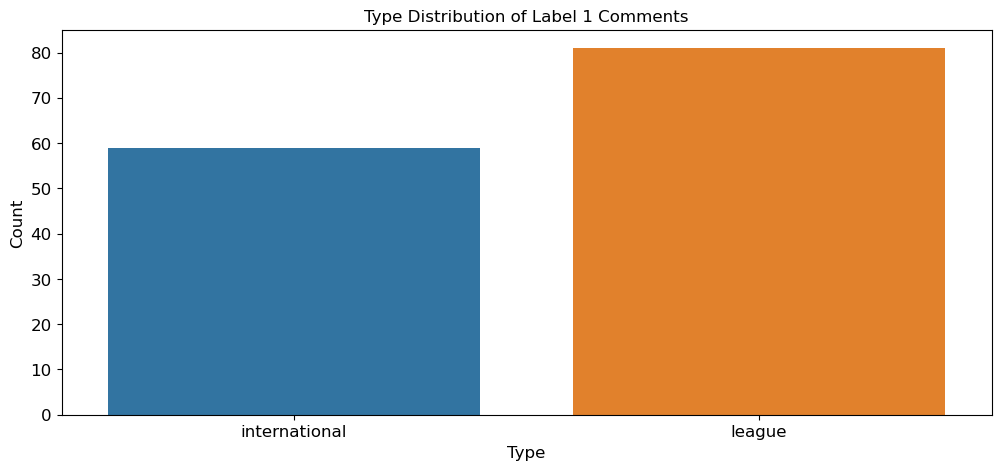

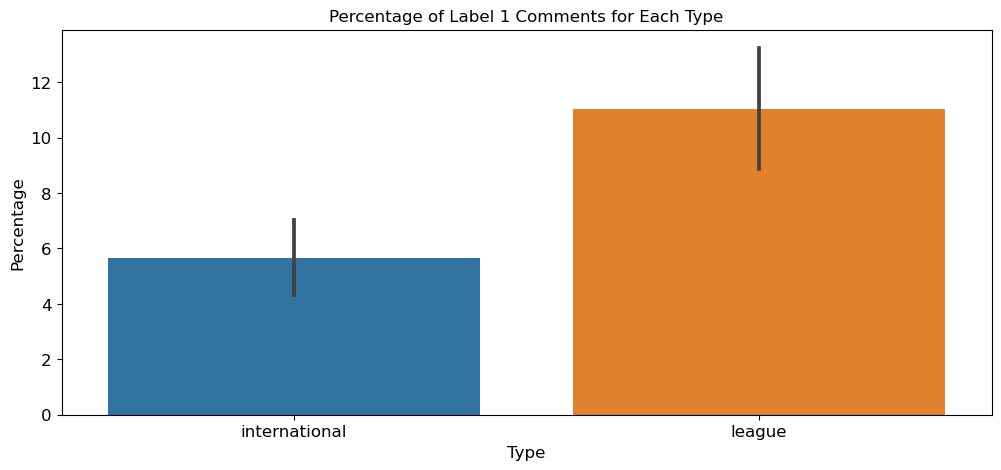

In [60]:
#copy dataframe
football_offense = new_data.copy()

#output number of label 1 and 0 comments
print(football_offense['label'].value_counts())

#find the percentage of label 1 comments
print(football_offense['label'].value_counts(normalize=True))

# find percentage of label 1 comments where type is international   
print(football_offense[football_offense['label'] == 1]['type'].value_counts(normalize=True))

# find percentage of label 1 comments where type is club
print(football_offense[football_offense['label'] == 1]['type'].value_counts(normalize=True))

# compare both types numerically and visually
print(football_offense[football_offense['label'] == 1]['type'].value_counts())
sns.countplot(x='type', data=football_offense[football_offense['label'] == 1])
plt.title('Type Distribution of Label 1 Comments')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# plot percentages of label 1 out of all comments for each type
sns.barplot(x=football_offense['type'], y=football_offense['label'], estimator=lambda x: sum(x==1)*100.0/len(x))
plt.title('Percentage of Label 1 Comments for Each Type')
plt.xlabel('Type')
plt.ylabel('Percentage')
plt.show()




